# Import Module

In [1]:
#numpy
import numpy as np
from numpy import column_stack

# pandas
import pandas as pd

# matplotlib
import matplotlib.pyplot as plt

import pickle 

# sklearn
from sklearn.svm import SVC
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, RobustScaler

# time
import time

# Ignore Warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
def load_data(path):
    
    """
    Returns dataframe
    """
    
    return pd.read_csv(filepath_or_buffer=path ,
                       sep=',',
                       names=['age', 'workclass' , 'education', 'marital_status', 'occupation', 'Race', 'sex' ,'hpw', 'native_country', 'income_pa'])

def preprocess_data():
    
    """
    returns one-hot-encoded for categorical and scaled for continuous features
    """
    
    col_one_hot_encode = train_X.select_dtypes(include=['object']).columns.tolist()
    col_continuous = train_X.select_dtypes(include=['int64']).columns.tolist()
    
    train_col = []
    test_col = []
    dev_col = []
    
    
    for col in train_X.columns.tolist():
        
        if col in col_one_hot_encode:
            
            """
            One-hot-encode categorical variables
            """
            
            # Label_encoder
            # fit label encoder
            label_encoder = LabelEncoder().fit(train_X[col])
            # transform label encoder       
            train_feature = label_encoder.transform(train_X[col])
            test_feature = label_encoder.transform(test_X[col])
            dev_feature = label_encoder.transform(dev_X[col])
            
            
            # reshape features
            train_feature = train_feature.reshape(train_X.shape[0], 1)
            test_feature = test_feature.reshape(test_X.shape[0], 1)
            dev_feature = dev_feature.reshape(dev_X.shape[0], 1)
            
            
            # onehot encoder
            # fit_onehot_encoder
            onehot_encoder = OneHotEncoder(sparse=False).fit(train_feature)
            # transform_one_hot_encoder
            train_feature = onehot_encoder.transform(train_feature)
            test_feature = onehot_encoder.transform(test_feature)
            dev_feature = onehot_encoder.transform(dev_feature)
            
        
        
        if col in col_continuous:
            
            """
            Standardize continuous variables
            """
            
            # Minmax scaler
            # fit scaler
            m_scaler = RobustScaler().fit(np.array(train_X[col]).reshape(-1,1))
            # transform using scaler
            train_feature = m_scaler.transform(np.array(train_X[col]).reshape(-1,1))
            test_feature = m_scaler.transform(np.array(test_X[col]).reshape(-1,1))
            dev_feature = m_scaler.transform(np.array(dev_X[col]).reshape(-1,1))
            
            
        # append
        train_col.append(np.array(train_feature))
        test_col.append(np.array(test_feature))
        dev_col.append(np.array(dev_feature))
        
        
    return column_stack(train_col), column_stack(test_col), column_stack(dev_col)


def split_features_y(df):
    
    """
    returns input features and output feature
    """
    
    label_en = LabelEncoder().fit(train_df['income_pa'])
    
    return df.iloc[:,:-1], np.where( label_en.transform(df['income_pa']) == 0, -1, 1)

In [31]:
# Load Dataset

train_fash_data = pd.read_csv('fashion-mnist_train.csv')
test_fas_data = pd.read_csv('fashion-mnist_test.csv')

# Load Data

In [32]:
X_train, X_val, Y_train, Y_val =  train_test_split(train_fash_data.drop('label', axis=1), train_fash_data['label'], test_size=0.2, random_state = 42, stratify =train_fash_data['label'])
X_test = test_fas_data.drop('label', axis=1)
Y_test = test_fas_data['label']
X_train.shape


(48000, 784)

In [33]:
X_train = X_train.iloc[36000:]
X_test = X_test.iloc[5000:]
Y_train = Y_train.iloc[36000:]
Y_test = Y_test.iloc[5000:]
X_val = X_val.iloc[7000:]
Y_val = Y_val.iloc[7000:]

In [34]:

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# Onehot encode labels
lab_scaler = LabelEncoder().fit(np.array(Y_train).reshape(-1,1))
Y_train = lab_scaler.transform(np.array(Y_train).reshape(-1,1))
Y_test = lab_scaler.transform(np.array(Y_test).reshape(-1,1))
Y_val = lab_scaler.transform(np.array(Y_val).reshape(-1,1))

In [3]:
# load training data
print('Load training data')
train_df = load_data(path='income-data/income.train.txt')

# load testing data
print('Load testing data')
test_df = load_data(path='income-data/income.test.txt')

#load dev data
print('Load dev set')
dev_df = load_data(path='income-data/income.dev.txt')

Load training data
Load testing data
Load dev set


# Preprocess Data

In [4]:
# split input_features and output_feature
train_X , Y_train = split_features_y(train_df)
test_X, Y_test = split_features_y(test_df)
dev_X, Y_dev = split_features_y(dev_df)

# Preprocess Data
X_train , X_test, X_dev = preprocess_data()


print('Training data consists of %s rows and %s columns ' % (X_train.shape[0], X_train.shape[1]) )
print('Testing data consists of %s rows and %s columns ' % (X_test.shape[0], X_test.shape[1]) )
print('Development data consists of %s rows and %s columns ' % (X_dev.shape[0], X_dev.shape[1]) )

Training data consists of 25000 rows and 94 columns 
Testing data consists of 2145 rows and 94 columns 
Development data consists of 1508 rows and 94 columns 


# SVM

# 14(a)

In [12]:
def svm_a():
    
    C = [0.0001, 0.001, 0.01, 0.1, 1 , 10, 100, 1000, 10000]
    
    train_acc ={}
    test_acc = {}
    dev_acc = {}
    train_acc_n_vec = {}
    
    for c in C:
        print('Evaluating Model for : ', c)
        model = SVC(C=c, kernel='linear', verbose=True)
        model.fit(X_train, Y_train)
        
        train_acc[c] = model.score(X_train, Y_train)
        train_acc_n_vec[c] = model
        test_acc[c] = model.score(X_test, Y_test)
        dev_acc[c] = model.score(X_val, Y_val)
        
    return train_acc, test_acc, dev_acc, train_acc_n_vec

In [ ]:
start = time.time()
train_acc_svma, test_acc_svma, dev_acc_svma, train_num_vec = svm_a( )
print('Time taken : ', time.time() - start)

Evaluating Model for :  0.0001
[LibSVM]

In [ ]:
def plot_svma(titl):
    
    x_train_svma, y_train_svma = zip(*sorted(train_acc_svma.items()))
    x_test_svma, y_test_svma = zip(*sorted(test_acc_svma.items()))
    x_dev_svma, y_dev_svma = zip(*sorted(dev_acc_svma.items()))
    
    x = [1, 2, 3, 4, 5, 6 ,7, 8, 9]
    y_tr = [y * 100 for y in y_train_svma]
    y_tst = [y * 100 for y in y_test_svma]
    y_dev = [y * 100 for y in y_dev_svma]
    
    labels = ['0.0001', '0.001', '0.01', '0.1', '1', '10', '100', '1000', '10000']
    
    plt.plot(x, y_tr, 'ro', color='b', label='train' , linestyle='-')
    plt.plot(x, y_tst, 'ro', color='g', label ='test' , linestyle='-')
    plt.plot(x, y_dev, 'ro', color='y', label = 'dev' , linestyle='-')
    
    plt.xticks(x, labels, rotation='vertical')
    plt.margins(0.2)
    plt.subplots_adjust(bottom=0.15)
    plt.legend(loc='lower right')
    plt.xlabel('Values of C')
    plt.title(titl)
    plt.ylabel('Accuracy')
    plt.savefig(titl+'.jpg', dpi=300)
    plt.show()    

In [ ]:
plot_svma('Training, Testing and Dev Set accuracy as function of C')

In [ ]:
c_val =[]
num_c_val = []
for k,v in train_num_vec.items():
    c_val.append(k)
    num_c_val.append(len(v.support_))
    
x = [1, 2, 3, 4, 5, 6 ,7, 8, 9]
labels = c_val

plt.plot(x, num_c_val, 'ro', color='b', label='Number of support vector' , linestyle='-')
plt.xticks(x, labels, rotation='vertical')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
plt.legend(loc='upper right')
plt.xlabel('Values of C')
plt.ylabel('Number of support vector')
plt.title('Number of support vectors as a function of c')
plt.savefig('Number of support vectors as a function of c.jpg', dpi=300)
plt.show()  

# 14(b)

In [ ]:
def svm_b(x_train, y_train, x_tst, y_tst):
    
    model = SVC(kernel='linear', C=10000)
    model.fit(x_train, y_train)
    
    results = model.predict(x_tst)
    
    print(confusion_matrix(y_tst, results))

In [ ]:
# Combine training and validation set
comb_X_data =  np.concatenate((X_train, X_dev), axis=0)
comb_Y_data = np.concatenate((Y_train, Y_dev), axis=0)

In [ ]:
svm_b(comb_X_data, comb_Y_data, X_test, Y_test)

# 14(c)

In [ ]:
def svm_c(k_type, i):
    
    model = SVC(kernel=k_type, C=10000, degree=i)
    model.fit(X_train, Y_train)
    
    return model

In [ ]:
model_2_linear = svm_c(k_type='linear', i=2)
model_2_poly = svm_c(k_type='poly', i=2)
model_3_poly = svm_c(k_type='poly', i=3)
model_4_poly = svm_c(k_type='poly', i=4)

In [ ]:
train_svm_c = {}

# training_set
train_svm_c['linear_2'] = model_2_linear.score(X_train, Y_train)
train_svm_c['poly_2'] = model_2_poly.score(X_train, Y_train)
train_svm_c['poly_3'] = model_3_poly.score(X_train, Y_train)
train_svm_c['poly_4'] = model_4_poly.score(X_train, Y_train)

test_svm_c = {}
# testing_set
test_svm_c['linear_2'] = model_2_linear.score(X_test, Y_test)
test_svm_c['poly_2'] = model_2_poly.score(X_test, Y_test)
test_svm_c['poly_3'] = model_3_poly.score(X_test, Y_test)
test_svm_c['poly_4'] = model_4_poly.score(X_test, Y_test)

dev_svm_c = {}
# dev_set
dev_svm_c['linear_2'] = model_2_linear.score(X_dev, Y_dev)
dev_svm_c['poly_2'] = model_2_poly.score(X_dev, Y_dev)
dev_svm_c['poly_3'] = model_3_poly.score(X_dev, Y_dev)
dev_svm_c['poly_4'] = model_4_poly.score(X_dev, Y_dev)

In [ ]:
def plot_svm_c(titl):
    
    x_train_svmc, y_train_svmc = zip(*sorted(train_svm_c.items()))
    x_test_svmc, y_test_svmc = zip(*sorted(test_svm_c.items()))
    x_dev_svmc, y_dev_svmc = zip(*sorted(dev_svm_c.items()))
    
    x = [1, 2, 3, 4]
    y_tr = [y * 100 for y in y_train_svmc]
    y_tst = [y * 100 for y in y_test_svmc]
    y_dev = [y * 100 for y in y_dev_svmc]
    
    labels = x_train_svmc
    
    plt.plot(x, y_tr, 'ro', color='b', label='train' , linestyle='-')
    plt.plot(x, y_tst, 'ro', color='g', label ='test' , linestyle='-')
    plt.plot(x, y_dev, 'ro', color='y', label = 'dev' , linestyle='-')
    
    plt.xticks(x, labels, rotation='vertical')
    plt.margins(0.2)
    plt.subplots_adjust(bottom=0.15)
    plt.legend(loc='lower right')
    plt.xlabel('Kernel Settings')
    plt.title(titl)
    plt.ylabel('Accuracy')
    plt.savefig(titl+'.jpg', dpi=300)
    plt.show()  

In [ ]:
plot_svm_c('Accuracy of train, test and dev with diff. kernel settings')

# 14(d)

In [6]:
def sign(num):
    return +1 if num>0 else -1

def r_y_kernel(row, aph, df_arr):
    
    ind_o = np.where(aph != 0)
    score = 0
    
    for t_i, ind in zip(aph[ind_o], ind_o):
        x_i = df_arr[int(ind[0])]
        
        score += np.sum(t_i * ((1 + np.dot(row, x_i)) ** 3))
        
    return -1 if score < 0 else 1

In [35]:
def kernalized_perceptron(deg, epochs):
    
    alpha = np.zeros(shape=(X_train.shape[0])) 
    count_mistakes_epochs = {}
    
    train_pred = []
    test_pred = []
    dev_pred = []
    
    
    # compute gram matrix
    print('Computing gram matrix')
    gm = polynomial_kernel(X_train, degree=deg)
    print('Gram matrix computed')
    
    for i in range(epochs):
        
        count_mistakes_batch = 0
        
        for j in range(X_train.shape[0]):
            
            y_pred = np.sign(np.sum(np.dot(gm[:,j], alpha)))
            
            if y_pred == 0:
                y_pred = -1
            
            if y_pred != Y_train[j]:
                
                count_mistakes_batch +=1
                
                alpha[j] += Y_train[j]
                
        count_mistakes_epochs[i+1] = count_mistakes_batch
        
    for tr in range(len(X_train)):
            train_pred.append(np.sign(r_y_kernel(X_train[tr], alpha, X_train)))
            
    train_acc = accuracy_score(Y_train, np.array(train_pred))
            
    for tr in range(len(X_test)):
            test_pred.append(np.sign(r_y_kernel(X_test[tr], alpha, X_test)))
    
    test_acc = accuracy_score(Y_test, np.array(test_pred))
            
    for tr in range(len(X_val)):
            dev_pred.append(np.sign(r_y_kernel(X_val[tr], alpha, X_val)))
            
    dev_acc = accuracy_score(Y_val, np.array(dev_pred))
  
    return count_mistakes_epochs, train_acc, test_acc, dev_acc

In [36]:
kp_erros, kp_train_acc, kp_test_acc, kp_dev_acc = kernalized_perceptron(3, 7)

Computing gram matrix
Gram matrix computed


In [37]:
def plot_kp_mistakes(num_mis):
    
    # get results of standard perceptron
    x,  y = zip(*sorted(num_mis.items()))
    
    
    plt.plot(x, y, label='Number of Mistakes', marker='o')
    plt.xticks(np.linspace(1,5 , 5))
    plt.xlabel('Number Of Epochs')
    plt.ylabel('Number of mistakes')
    plt.legend(loc='upper middle')
    plt.title('Number of mistakes per epoch in kernalized perceptron ')
    plt.savefig('num_mistakes_sp_vs_avp.jpg', dpi=300)
    plt.show() 

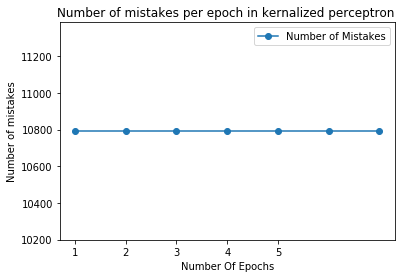

In [38]:
plot_kp_mistakes(kp_erros)

In [40]:
print('Kernilized perceptron Accuracy Train %.2f ' %(kp_train_acc*1000))
print('Kernelized perceptron accuracy Test %.2f ' %(kp_test_acc*1000))
print('kernelized Accuracy on Validation data %.2f ' %(kp_dev_acc*1000))

Kernilized perceptron Accuracy Train 100.67 
Kernelized perceptron accuracy Test 102.00 
kernelized Accuracy on Validation data 98.40 
